<a href="https://colab.research.google.com/github/joon0725/DL-Study/blob/master/Playground/2.cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 대충 만든 cifar10 예제
# 돌려보면 알겠지만 정확도가 심각함
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_images = train_images / 255.0
test_images  = test_images / 255.0

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
input = layers.Input(shape=(32, 32, 3))
conv1 = layers.Conv2D(128, 3, activation='relu')(input)
pool1 = layers.MaxPool2D((2, 2))(conv1)
drop1 = layers.Dropout(0.25)(pool1)
conv2 = layers.Conv2D(256, 3, activation='relu')(drop1)
pool2 = layers.MaxPool2D((2, 2))(conv2)
drop2 = layers.Dropout(0.25)(pool2)
conv3 = layers.Conv2D(128, 3, activation='relu')(drop2)
pool3 = layers.MaxPool2D((2, 2))(conv3)
drop3 = layers.Dropout(0.25)(pool3)
flat = layers.Flatten()(drop3)
dense1 = layers.Dense(128, activation='relu')(flat)
output = layers.Dense(10, activation='softmax')(dense1)
model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 28s 73ms/step - loss: 1.7322 - accuracy: 0.3555 - val_loss: 1.4215 - val_accuracy: 0.4834
Epoch 2/50
313/313 [==============================] - 22s 69ms/step - loss: 1.3548 - accuracy: 0.5091 - val_loss: 1.1891 - val_accuracy: 0.5759
Epoch 3/50
313/313 [==============================] - 23s 73ms/step - loss: 1.1994 - accuracy: 0.5712 - val_loss: 1.0700 - val_accuracy: 0.6283
Epoch 4/50
313/313 [==============================] - 29s 93ms/step - loss: 1.0995 - accuracy: 0.6102 - val_loss: 0.9951 - val_accuracy: 0.6564
Epoch 5/50
313/313 [==============================] - 26s 82ms/step - loss: 1.0059 - accuracy: 0.6456 - val_loss: 0.9142 - val_accuracy: 0.6832
Epoch 6/50
313/313 [==============================] - 23s 74ms/step - loss: 0.9474 - accuracy: 0.6661 - val_loss: 0.9045 - val_accuracy: 0.6926
Epoch 7/50
313/313 [==============================] - 23s 75ms/step - loss: 0.8935 - accuracy: 0.6859 - val_loss: 0.8564 - val_accuracy:

KeyboardInterrupt: 

In [26]:
import numpy as np
vloss = history.history['val_loss']
loss = history.history['loss']
x_len = np.arange(len(loss))

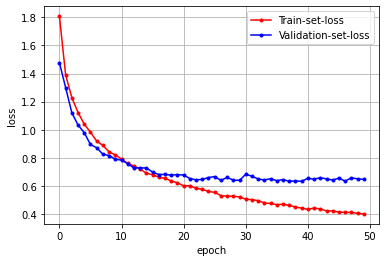

In [27]:
import matplotlib.pyplot as plt
plt.plot(x_len, loss, marker='.', c='red', label='Train-set-loss')
plt.plot(x_len, vloss, marker='.', c='blue', label='Validation-set-loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
model.save('cifar.h5')

In [30]:
model.save('./cifar10.h5')

In [31]:
model.save_weights('./cifar10_w.h5')